# Decision Trees

## 1. Importing the housing dataset

In [172]:
# importing the necessary libraries related to decision trees

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from sklearn import tree
from sklearn import metrics
import warnings


In [4]:
# filter or remove all warnings
warnings.filterwarnings("ignore")

In [5]:
# reading the housing.csv dataset and displaying the top five records
df=pd.read_csv('housing.csv')

In [6]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [10]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### 2. Checking for any missing values in data set

In [12]:
df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [13]:
# filling the missing values with mean
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [176]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [15]:
# Constructing the correlation matrix for all features
corr_matrix=df.corr()

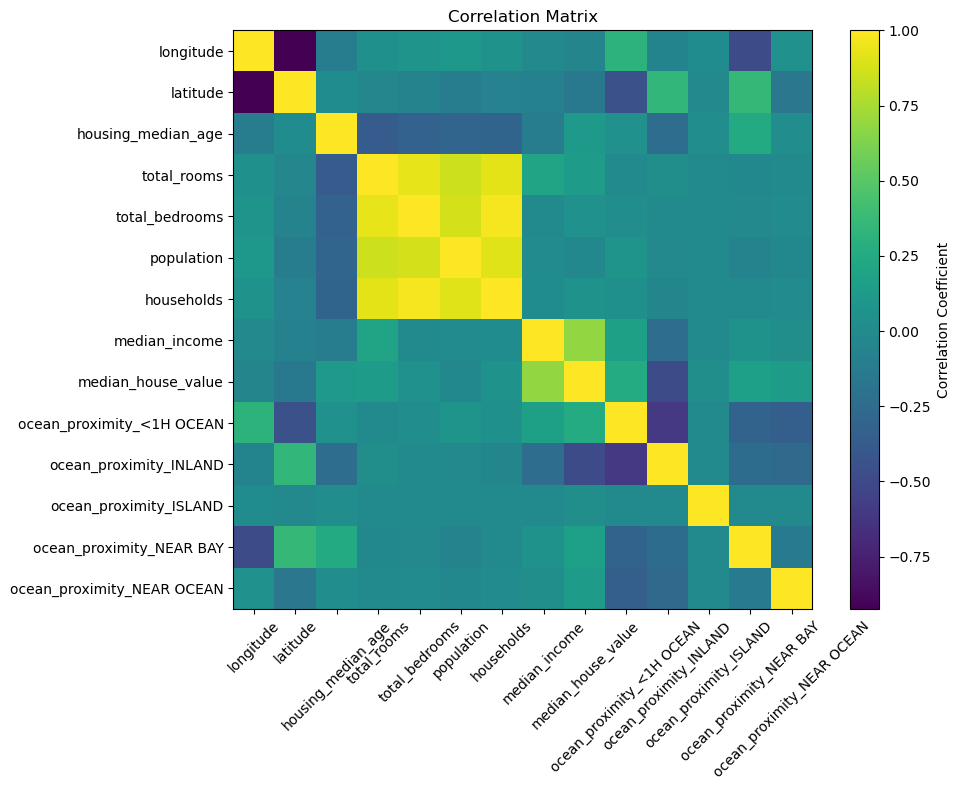

In [16]:
# Displaying the correlation matrix in heat map form
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

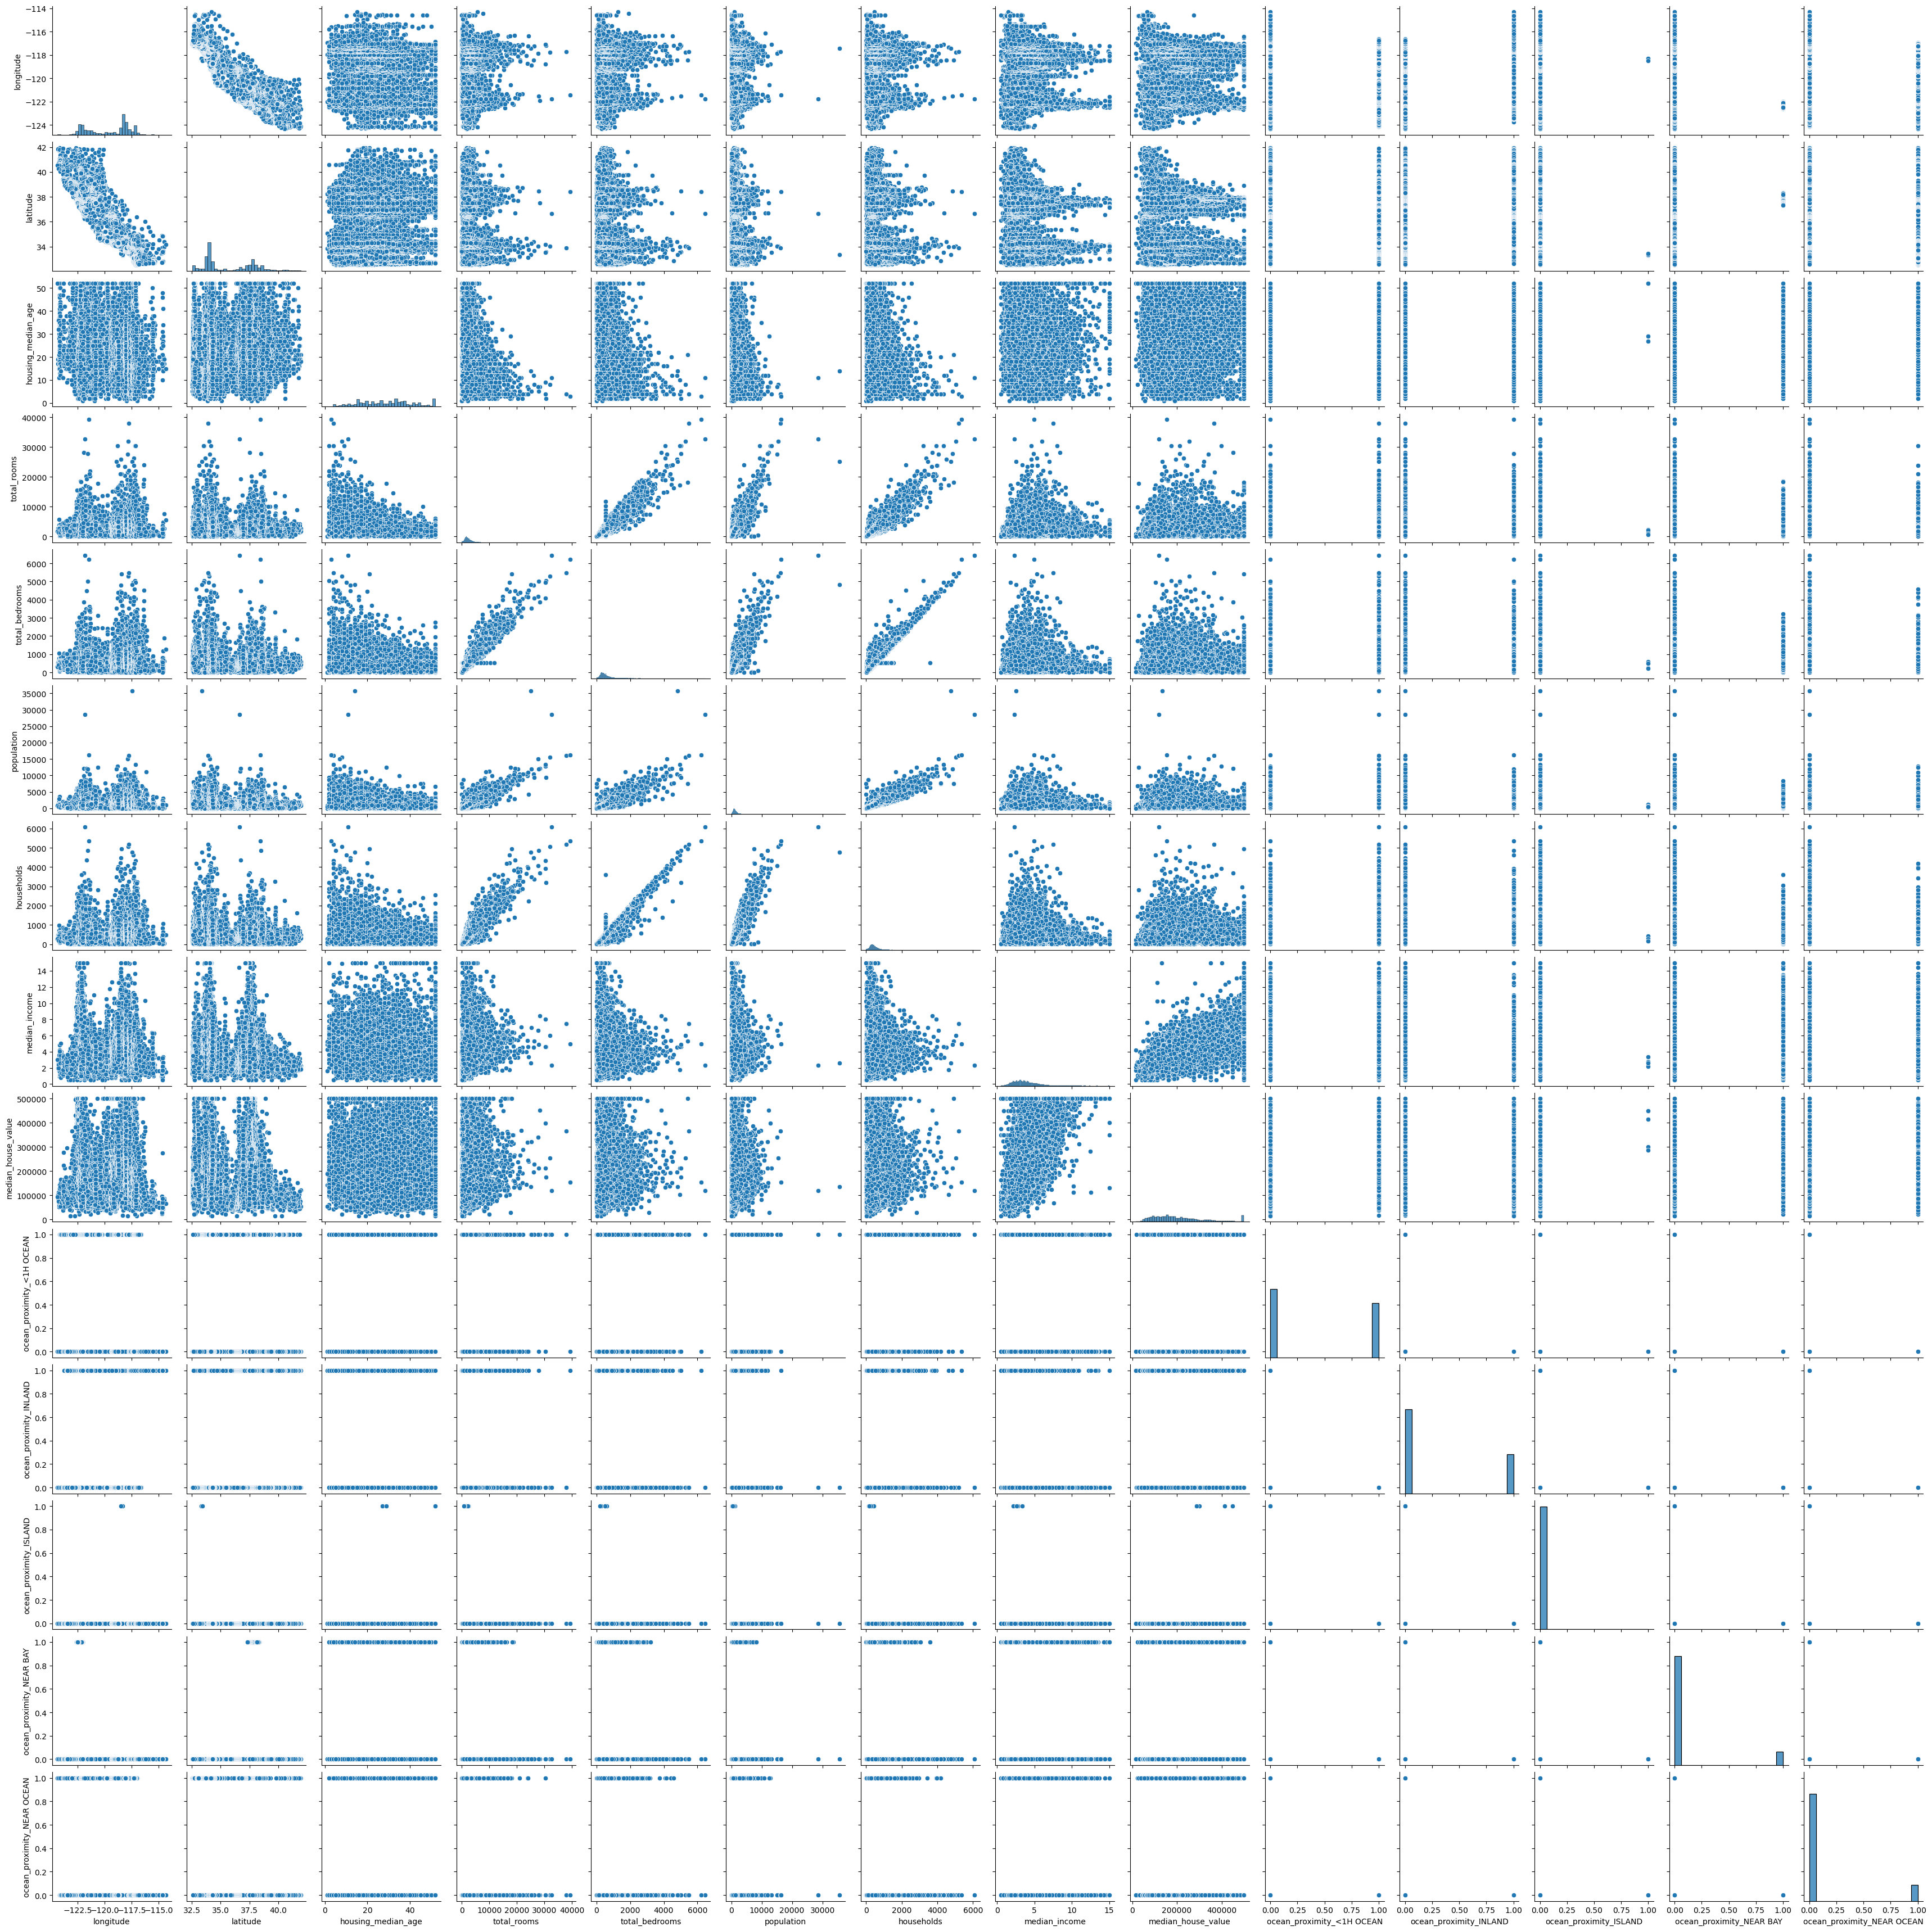

In [17]:
# pair plot of all the features in the data frame
sns.pairplot(df)
plt.show()

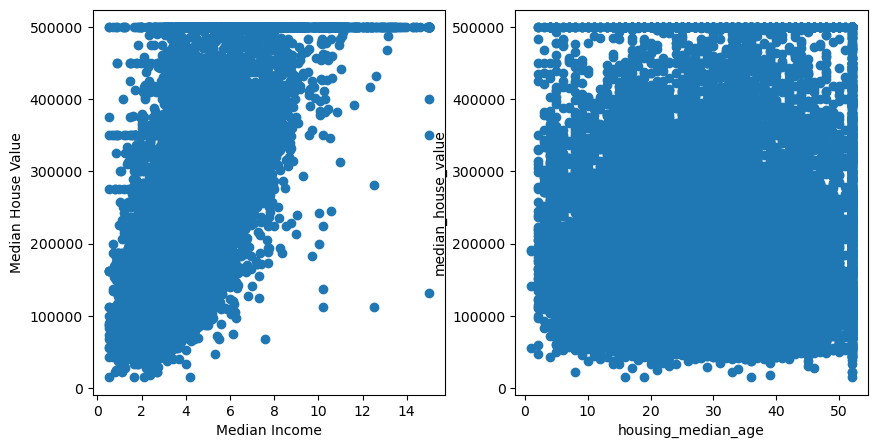

In [18]:
# plotting the scatter plot between the Median House value and Median Income and House age
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(df['median_income'], df['median_house_value'])
axs[0].set_xlabel('Median Income')
axs[0].set_ylabel('Median House Value')
axs[1].scatter(df['housing_median_age'], df['median_house_value'])
axs[1].set_xlabel('housing_median_age')
axs[1].set_ylabel('median_house_value')
plt.show()

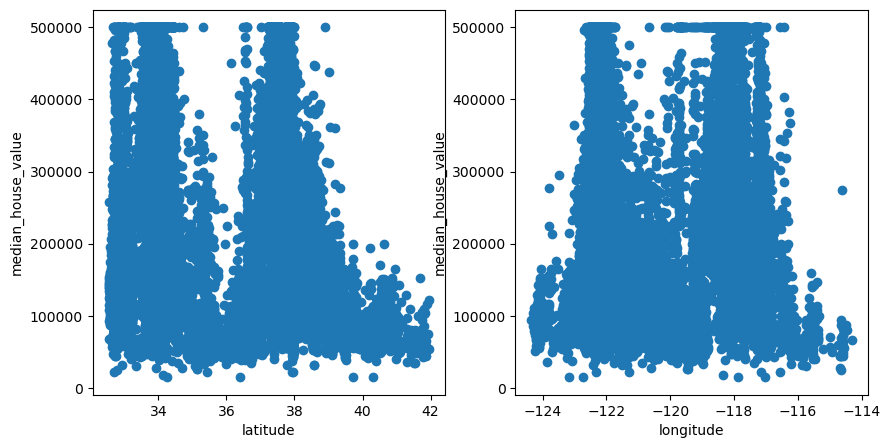

In [19]:
# plotting the scatter plot between the Median House value and latitiide , longitude
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(df['latitude'], df['median_house_value'])
axs[0].set_xlabel('latitude')
axs[0].set_ylabel('median_house_value')
axs[1].scatter(df['longitude'], df['median_house_value'])
axs[1].set_xlabel('longitude')
axs[1].set_ylabel('median_house_value')
plt.show()

In [20]:
# Seperating the data into inputs and outputs
X=df.drop("median_house_value",axis=1)
y=df['median_house_value']


### 4. Splitting the data into train and test set

No scaling is required in decision tress, it is insentive to the scale

In [23]:
# splitting the data set into train and test splits
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# Displaying the inputs features
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0           322.0       126.0         8.3252                      False   
1          2401.0      1138.0         8.3014                      False   
2           496.0       177.0         7.2574                      False   
3           558.0       219.0         5.6431                      False   
4           565.0       259.0         3.8462                      False   
...           ...         ...            ...                        ...   
20635       845.0       330.0         1.5603                      False   
20636       356.0       114.0         2.5568                      False   
20637      1007.0       433.0         1.7000                      False   
20638       741.0       349.0         1.8672                      False   
20639      1387.0       530.0         2.3886                      False   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
20635                    True                   False   
20636                    True                   False   
20637                    True                   False   
20638                    True                   False   
20639                    True                   False   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                          True                       False  
1                          True                       False  
2                          True                       False  
3                          True                       False  
4                          True                       False  
...                         ...                         ...  
20635                     False                       False  
20636                     False                       False  
20637                     False                       False  
20638                     False                       False  
20639                     False                       False  

[20640 rows x 13 columns]

In [25]:
# Displaying the target feature
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [26]:
# Printing the dimensions of the training set
X_train.shape

(16512, 13)

In [27]:
# Printing the dimensions of the training set
X_test.shape

(4128, 13)

### 5. Build a regression tree using the training data

In [29]:
# Using the inbuilt decision tree regressor for constructing the model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
# getting the depth of the tree
regressor.get_depth()

37

In [31]:
# Getting the no of leaves of the tree
regressor.get_n_leaves()

15805

In [32]:
# Predicting the train and test data set samples
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

### 6. Inspect the evaluation measures such as MAE, MSE, or RMSE 

In [34]:
# Calculating the mse , mae and rmse on the predicted vs actual data samples of train samples
import math

mae=mean_absolute_error(y_train, y_pred_train)
mse=mean_squared_error(y_train, y_pred_train)
rmse= math.sqrt(mse)
r2=r2_score(y_train,y_pred_train)
print(f"The Mean Abs Error on Train data is {mae}")
print(f"The Mean Sq Error on Train data is {mse}")
print(f"The Root Mean Sq Error on Train data is {rmse}")
print(f"The R2 score on the train data is {r2}")

The Mean Abs Error on Train data is 0.0
The Mean Sq Error on Train data is 0.0
The Root Mean Sq Error on Train data is 0.0
The R2 score on the train data is 1.0


In [100]:
# Calculating the mse , mae and rmse on the predicted vs actual data samples of test samples
mae=mean_absolute_error(y_test, y_pred_test)
mse=mean_squared_error(y_test, y_pred_test)
rmse= math.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print(f"The Mean Abs Error on test data is {mae:.2f}")
print(f"The Mean Sq Error on Test data is {mse:.2f}")
print(f"The Root Mean Sq Error on Test data is {rmse:.2f}")
print(f"The R2 score on the test data is {r2:.2f}")

The Mean Abs Error on test data is 43655.37
The Mean Sq Error on Test data is 4790624903.43
The Root Mean Sq Error on Test data is 69214.34
The R2 score on the test data is 0.63


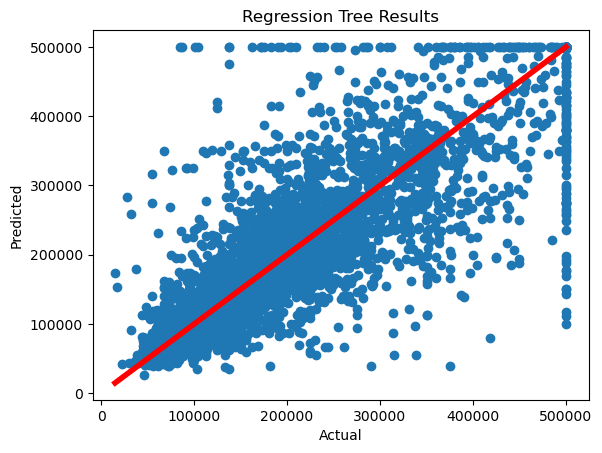

In [36]:
# Scatter plot test result using regression line
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Tree Results')
plt.show()

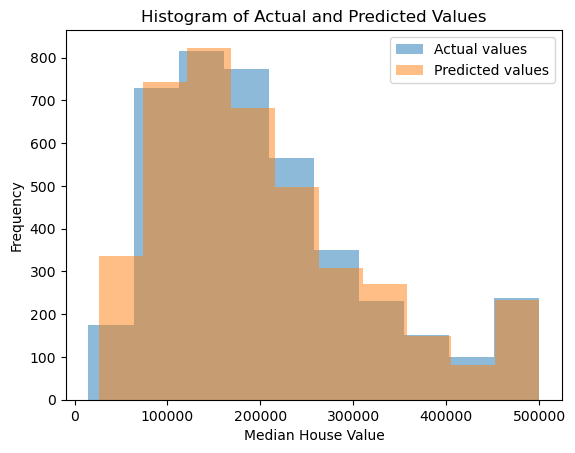

In [37]:
# Plotting the histogram of actual vs predicted values of test data
plt.hist(y_test, alpha=0.5, label="Actual values")
plt.hist(y_pred_test, alpha=0.5, label="Predicted values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Actual and Predicted Values")
plt.legend()
plt.show()

### 7. Modifying hyperparameters with different values and plotting them vs mse

In [39]:
# Gathering the mse with different values of min_samples_split
splitter_param=['best','random']
mse=[[],[]]
mse_train=[[],[]]
for i in range(len(splitter_param)):
    for j in range(2,50,2):
        model=DecisionTreeRegressor(splitter=splitter_param[i], min_samples_split=j)
        model.fit(X_train,y_train)
        mse[i].append(mean_squared_error(y_test,model.predict(X_test)))
        mse_train[i].append(mean_squared_error(y_train,model.predict(X_train)))

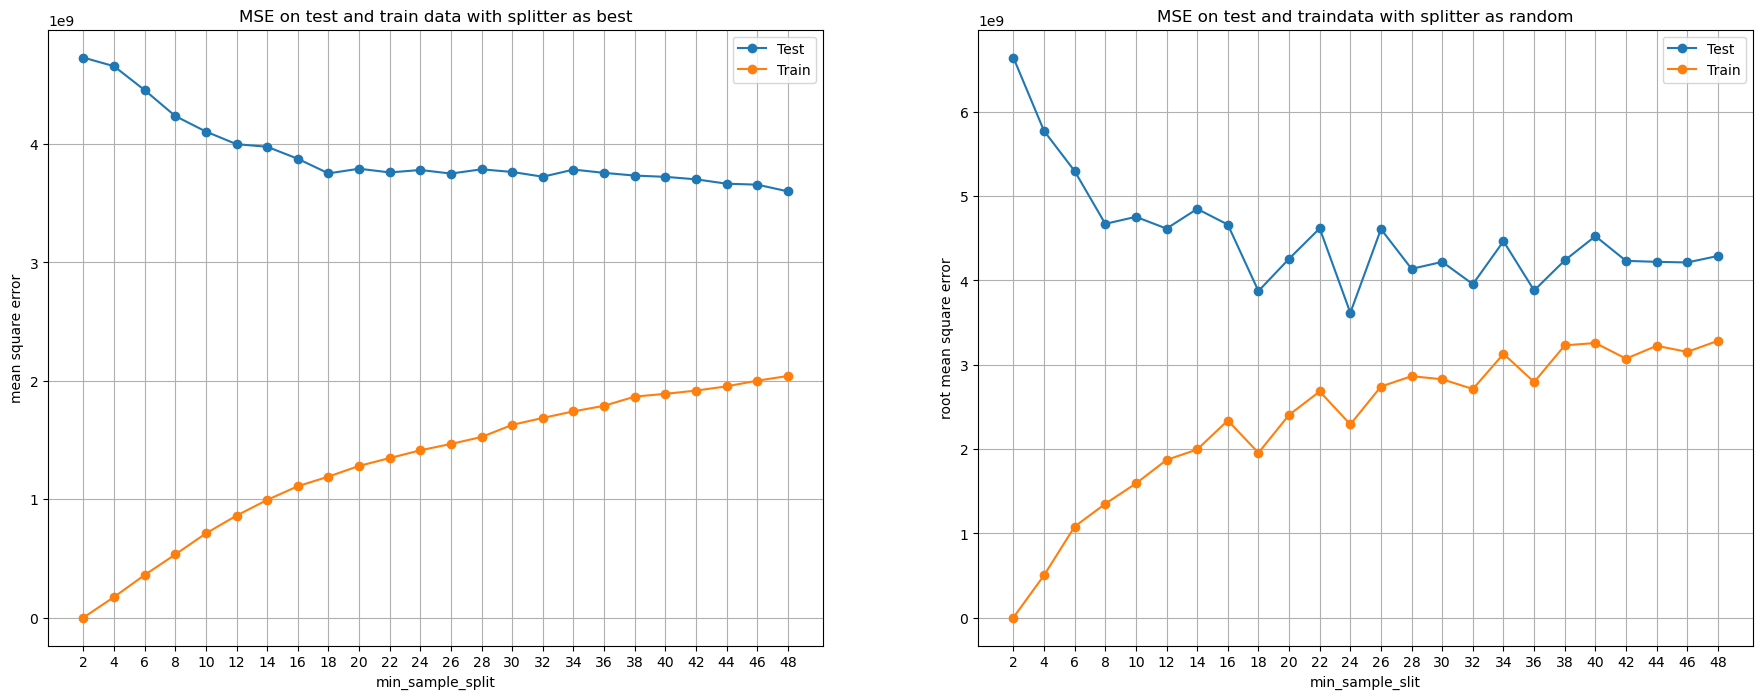

In [40]:
# Plotting of mse vs different values of min_samples_split in both best and random
fig, axis = plt.subplots(1, 2, figsize=(22,8))

axis[0].plot(range(2,50,2), mse[0], marker = "o",label='Test')
axis[0].plot(range(2,50,2),mse_train[0],marker='o',label='Train')
axis[0].set_title("MSE on test and train data with splitter as best")
axis[0].set_xlabel("min_sample_split")
axis[0].set_ylabel("mean square error")
axis[0].legend()
axis[0].set_xticks(range(2,50,2))
axis[0].grid(visible=True)


axis[1].plot(range(2,50,2), mse[1], marker = "o", label='Test')
axis[1].plot(range(2,50,2),mse_train[1],marker='o',label='Train')
axis[1].set_title("MSE on test and traindata with splitter as random")
axis[1].set_xlabel("min_sample_slit")
axis[1].set_ylabel("root mean square error")
axis[1].set_xticks(range(2,50,2))
axis[1].grid(visible=True)
axis[1].legend()

plt.show()

In [41]:
# Gathering the mse with different values of max_depth
splitter_param=['best','random']
mse=[[],[]]
mse_train=[[],[]]
for i in range(len(splitter_param)):
    for j in range(1,30):
        model=DecisionTreeRegressor(splitter=splitter_param[i], max_depth=j)
        model.fit(X_train,y_train)
        mse[i].append(mean_squared_error(y_test,model.predict(X_test)))
        mse_train[i].append(mean_squared_error(y_train,model.predict(X_train)))

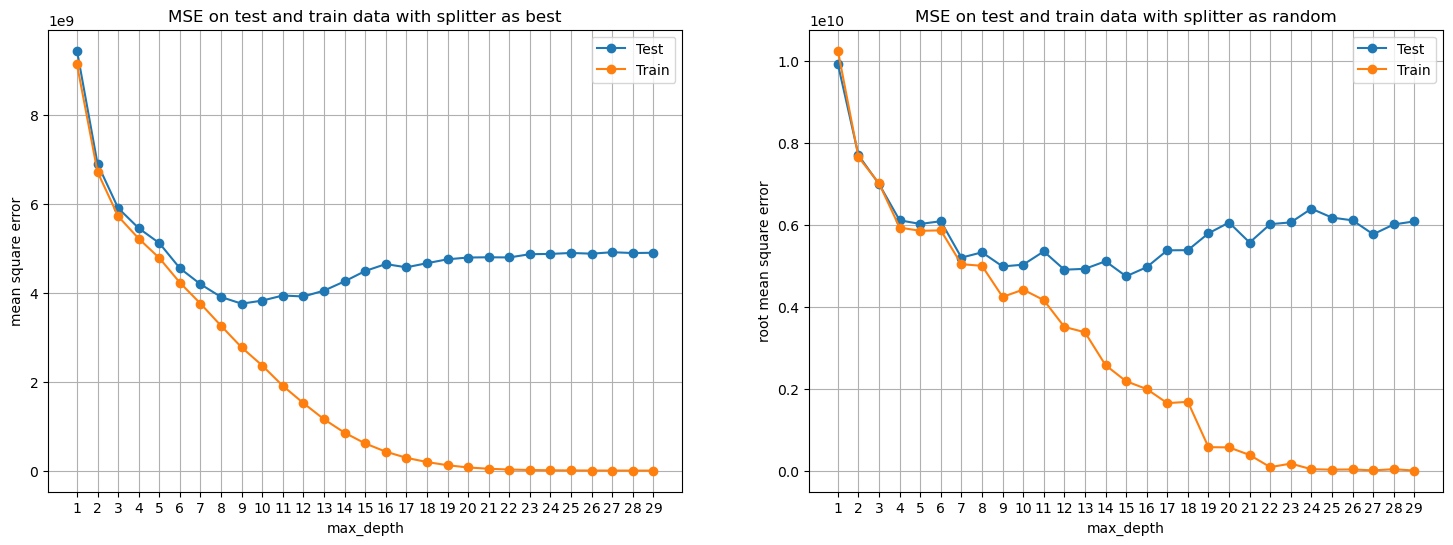

In [42]:
# Plotting of mse vs different values of max_depth in both best and random
fig, axis = plt.subplots(1, 2, figsize=(18,6))

axis[0].plot(range(1,30), mse[0], marker = "o",label='Test')
axis[0].plot(range(1,30),mse_train[0],marker='o',label='Train')
axis[0].set_title("MSE on test and train data with splitter as best")
axis[0].set_xlabel("max_depth")
axis[0].set_ylabel("mean square error")
axis[0].set_xticks(range(1,30))
axis[0].grid(visible=True)
axis[0].legend()


axis[1].plot(range(1,30), mse[1], marker = "o",label='Test')
axis[1].plot(range(1,30),mse_train[1],marker='o',label='Train')
axis[1].set_title("MSE on test and train data with splitter as random")
axis[1].set_xlabel("max_depth")
axis[1].set_ylabel("root mean square error")
axis[1].set_xticks(range(1,30))
axis[1].grid(visible=True)
axis[1].legend()

plt.show()

In [43]:
# Gathering the mse with different values of min_samples_leaf
splitter_param=['best','random']
mse=[[],[]]
mse_train=[[],[]]
for i in range(len(splitter_param)):
    for j in range(1,30):
        model=DecisionTreeRegressor(splitter=splitter_param[i], min_samples_leaf=j)
        model.fit(X_train,y_train)
        mse[i].append(mean_squared_error(y_test,model.predict(X_test)))
        mse_train[i].append(mean_squared_error(y_train,model.predict(X_train)))

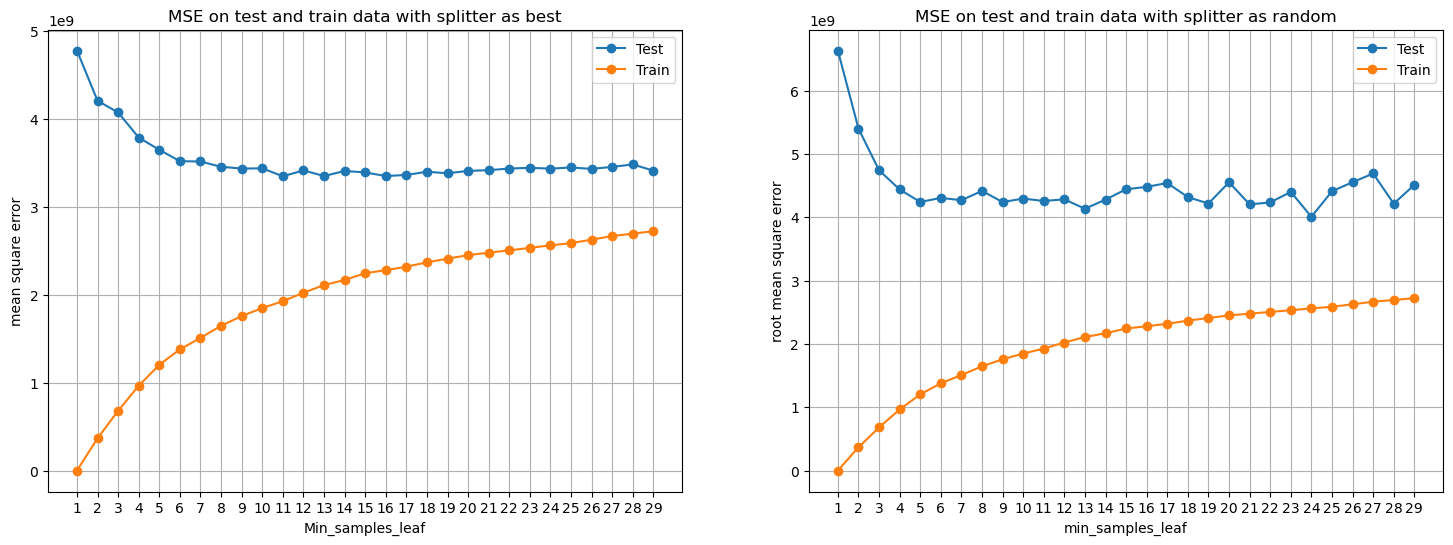

In [44]:
# Plotting of mse vs different values of min_samples_leaf in both best and random
fig, axis = plt.subplots(1, 2, figsize=(18,6))

axis[0].plot(range(1,30), mse[0], marker = "o",label="Test")
axis[0].plot(range(1,30),mse_train[0],marker='o',label='Train')
axis[0].set_title("MSE on test and train data with splitter as best")
axis[0].set_xlabel("Min_samples_leaf")
axis[0].set_ylabel("mean square error")
axis[0].set_xticks(range(1,30))
axis[0].grid(visible=True)
axis[0].legend()


axis[1].plot(range(1,30), mse[1], marker = "o",label="Test")
axis[1].plot(range(1,30),mse_train[0],marker='o',label='Train')
axis[1].set_title("MSE on test and train data with splitter as random")
axis[1].set_xlabel("min_samples_leaf")
axis[1].set_ylabel("root mean square error")
axis[1].set_xticks(range(1,30))
axis[1].grid(visible=True)
axis[1].legend()

plt.show()

### 8 . Using RandomizedSearchCV to obtain best hyperparameters

In [46]:
# Using Randomsearch cv and gridsearchcv on hyperparameters to select best among all
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid = {'splitter':['best','random'],
              'max_depth': [1,3,5,7,9,11,13,15],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_split': [1,3,5,7,9,11,13,15,17,19,21],
              'max_leaf_nodes':[None,10,20,30,40,50,60,70]
             }


In [47]:
# Intializing randomsearch cv decession tree regressor and above param grid with accuracy as 'neg_mean_squared_error'
random_search = RandomizedSearchCV(regressor, param_grid,cv=10, n_iter=100, random_state=42,scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                      15],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
                                                              21],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='neg_mean_squared_error')

In [117]:
# Printing the best parameters from the above computation
best_params = random_search.best_params_
best_params

{'splitter': 'best',
 'min_samples_split': 11,
 'min_samples_leaf': 8,
 'max_leaf_nodes': None,
 'max_depth': 15}

In [119]:
random_search.best_score_

-3457284002.87893

### 9 . Compute the MAE, MSE, or RMSE for your model.

In [122]:
# Build the final model with the best hyperparameters
random_search_tree = DecisionTreeRegressor(**best_params, random_state=42)
random_search_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=8, min_samples_split=11,
                      random_state=42)

In [124]:
y_pred = random_search_tree.predict(X_test)

In [98]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"The Mean Abs Error on test data is {mae:.2f}")
print(f"The Mean Sq Error on Test data is {mse:.2f}")
print(f"The Root Mean Sq Error on Test data is {rmse:.2f}")
print(f"The R2 score on the test data is {r2:.2f}")

The Mean Abs Error on test data is 37698.63
The Mean Sq Error on Test data is 3405053920.24
The Root Mean Sq Error on Test data is 58352.84
The R2 score on the test data is 0.74


We can observe that the errors are reduced by using random search cv

### 10. Determine which features are the most important in your model.

In [128]:
importance = random_search_tree.feature_importances_
importance

array([0.10233617, 0.09225477, 0.04148971, 0.01194117, 0.01327975,
       0.01729381, 0.00886238, 0.53952176, 0.00517672, 0.16355236,
       0.        , 0.00065152, 0.00363987])

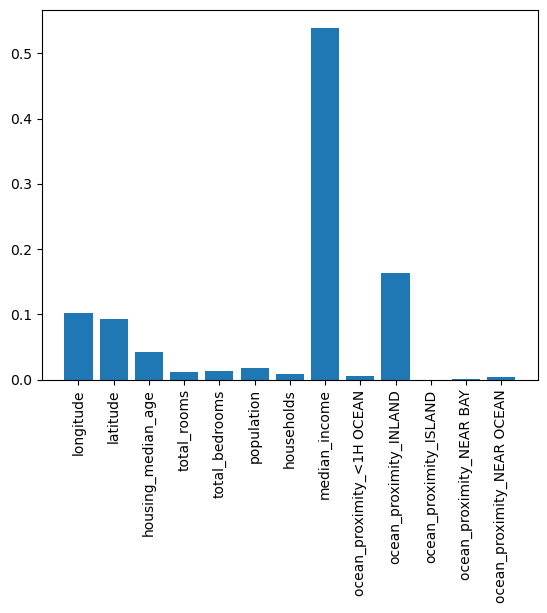

In [130]:
position = range(len(importance))
plt.bar(position, importance)
features = X.columns
plt.xticks(position, features, rotation=90);

We can observe that longitude, latitude, housing median age, median income and ocean promitity is the important features and it will come in the first few depths of the decision tree

In [162]:
random_search_tree.get_n_leaves()

1355

In [163]:
random_search_tree.get_depth()

15

### 11. Take some values for the explanatory variables and use your model to predict the median house value.

In [164]:
data = pd.DataFrame({
    'latitude': [37.12, 38.90, 39.45],
    'longitude': [-122.34, -121.12, -120.75],
    'housing_median_age': [21.0, 17.0, 40.0],
    'total_rooms': [16.0, 27.0, 80.0],
    'total_bedrooms': [11.0, 17.0, 60.0],
    'population': [255.0, 897.0, 451.0],
    'households': [872.0, 972.0, 345.0],
    'median_income': [2.34, 2.89, 1.68],
    'ocean_proximity_INLAND': [1,0,0],
    'ocean_proximity_<1H OCEAN': [1,0,0],
    'ocean_proximity_ISLAND': [0,1,0],
    'ocean_proximity_NEAR BAY': [0,0,1],
    'ocean_proximity_NEAR OCEAN': [1,0,0]
})

In [165]:
X_new = data.values
predicted_medians = random_search_tree.predict(X_new)
print("Predicted median house values:", predicted_medians)

Predicted median house values: [ 93962.5 107090.   95425. ]
